<a href="https://colab.research.google.com/github/Amithashreshta/257_individual/blob/main/CMPE_257_StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction using Ridge Linear Regression and LSTM Neural Networks 

## Importing the libraries and Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
stock_price_df = pd.read_csv('stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
stock_vol_df = pd.read_csv('stock_volume.csv')
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [ ]:
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
stock_vol_df = stock_price_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_price_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


## Defining the functions for visualization and performing EDA

In [ ]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
def plotting_func(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
plotting_func(stock_price_df, 'Stock Prices')

In [ ]:
plotting_func(stock_vol_df, 'Stock Volume')

## Splitting the data set into test and training dataset
I have divided the data into 75% training and 25% testing data

In [ ]:
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [ ]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [ ]:
price_vol_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')  ## for APPLE
price_vol_df

,Date,Close,Volume
0,2012-01-12,60.198570,60.198570
1,2012-01-13,59.972858,59.972858
2,2012-01-17,60.671429,60.671429
3,2012-01-18,61.301430,61.301430
4,2012-01-19,61.107143,61.107143
...,...,...,...
2154,2020-08-05,440.250000,440.250000
2155,2020-08-06,455.609985,455.609985
2156,2020-08-07,444.450012,444.450012
2157,2020-08-10,450.910004,450.910004


In [ ]:
price_vol_target_df = trading_window(price_vol_df)
price_vol_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,60.198570,59.972858
1,2012-01-13,59.972858,59.972858,60.671429
2,2012-01-17,60.671429,60.671429,61.301430
3,2012-01-18,61.301430,61.301430,61.107143
4,2012-01-19,61.107143,61.107143,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,440.250000,455.609985
2155,2020-08-06,455.609985,455.609985,444.450012
2156,2020-08-07,444.450012,444.450012,450.910004
2157,2020-08-10,450.910004,450.910004,437.500000


In [ ]:
price_vol_target_df = price_vol_target_df[:-1]
price_vol_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,60.198570,59.972858
1,2012-01-13,59.972858,59.972858,60.671429
2,2012-01-17,60.671429,60.671429,61.301430
3,2012-01-18,61.301430,61.301430,61.107143
4,2012-01-19,61.107143,61.107143,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,438.660004,440.250000
2154,2020-08-05,440.250000,440.250000,455.609985
2155,2020-08-06,455.609985,455.609985,444.450012
2156,2020-08-07,444.450012,444.450012,450.910004


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_vol_target_scaled_df = sc.fit_transform(price_vol_target_df.drop(columns = ['Date']))
price_vol_target_scaled_df

array([[0.01102638, 0.01102638, 0.01046185],
       [0.01046185, 0.01046185, 0.01220906],
       [0.01220906, 0.01220906, 0.01378478],
       ...,
       [1.        , 1.        , 0.97208751],
       [0.97208751, 0.97208751, 0.98824476],
       [0.98824476, 0.98824476, 0.95470465]])

In [ ]:
price_vol_target_scaled_df.shape

(2158, 3)

In [ ]:
X = price_vol_target_scaled_df[:,:2]
Y = price_vol_target_scaled_df[:,2:]

In [ ]:
X.shape, Y.shape

((2158, 2), (2158, 1))

In [ ]:
split = int(0.75 * len(X))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

In [ ]:
X_train.shape, Y_train.shape

((1618, 2), (1618, 1))

In [ ]:
X_test.shape, Y_test.shape

((540, 2), (540, 1))

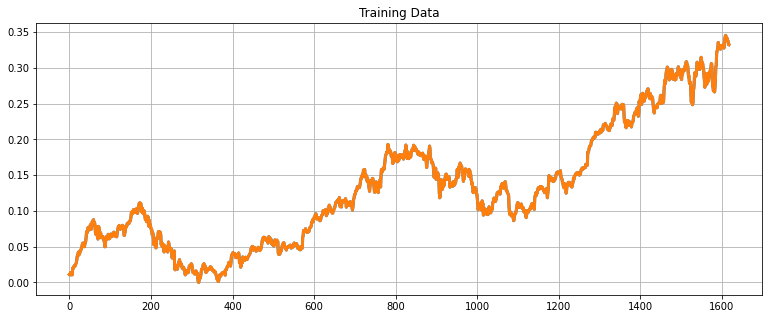

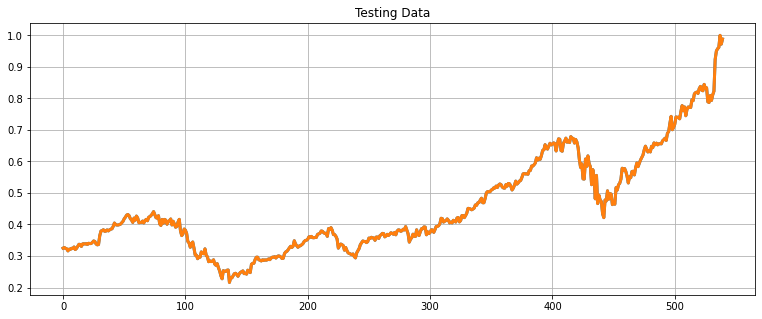

In [ ]:
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

## Model based on Ridge Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
regression_model=Ridge() ##class declaratin
regression_model.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
l_accuracy= regression_model.score(X_test, Y_test)
print("Linear Ridge Regression score: ", l_accuracy)

Linear Ridge Regression score:  0.9810214541122102


In [ ]:
predicted_prices= regression_model.predict(X)
predicted_prices
                                

array([[0.01628147],
       [0.01574067],
       [0.01741442],
       ...,
       [0.96367139],
       [0.93693254],
       [0.95241043]])

In [ ]:
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])
len(Predicted)

2158

In [ ]:
close=[]
for i in price_vol_target_scaled_df:
  close.append(i[0])

In [ ]:
df_predicted = price_vol_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [ ]:
df_predicted['close']= close
df_predicted

,Date,close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [ ]:
df_predicted['Prediction']=Predicted
df_predicted

,Date,close,Prediction
0,2012-01-12,0.011026,0.016281
1,2012-01-13,0.010462,0.015741
2,2012-01-17,0.012209,0.017414
3,2012-01-18,0.013785,0.018924
4,2012-01-19,0.013299,0.018458
...,...,...,...
2153,2020-08-04,0.957606,0.923060
2154,2020-08-05,0.961583,0.926869
2155,2020-08-06,1.000000,0.963671
2156,2020-08-07,0.972088,0.936933


In [ ]:
plotting_func(df_predicted, "Original vs Prediction")

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#Model Evaluation

print('Accuracy on the training set: {:.3f}'.format(regression_model.score(X_train,Y_train)))
print('Accuracy on the test set: {:.3f}'.format(regression_model.score(X_test,Y_test)))


Accuracy on the training set: 0.996
Accuracy on the test set: 0.981


## Model based on LSTM; Long Short Term Memory Networks(Recurrent neural networks). 
Artificial neural Networks are information processing models that are inspired by the human brain. A recurrent Neural Network is a type of an ANN which overcomes the disadvantage of the feed forward neural network by including the memory and time dependency.

## Training an LSTM model

In [ ]:
price_vol_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_vol_df

,Date,Close,Volume
0,2012-01-12,60.198570,60.198570
1,2012-01-13,59.972858,59.972858
2,2012-01-17,60.671429,60.671429
3,2012-01-18,61.301430,61.301430
4,2012-01-19,61.107143,61.107143
...,...,...,...
2154,2020-08-05,440.250000,440.250000
2155,2020-08-06,455.609985,455.609985
2156,2020-08-07,444.450012,444.450012
2157,2020-08-10,450.910004,450.910004


In [ ]:
training_data = price_vol_df.iloc[:, 1:3].values
training_data

array([[ 60.19857 ,  60.19857 ],
       [ 59.972858,  59.972858],
       [ 60.671429,  60.671429],
       ...,
       [444.450012, 444.450012],
       [450.910004, 450.910004],
       [437.5     , 437.5     ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
X = []
Y = []
for i in range(1, len(price_vol_df)):
    X.append(training_set_scaled [i-1:i, 0])
    Y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.01102638]),
 array([0.01046185]),
 array([0.01220906]),
 array([0.01378478]),
 array([0.01329884]),
 array([0.01063693]),
 array([0.01317736]),
 array([0.01067623]),
 array([0.02005545]),
 array([0.01933012]),
 array([0.02027698]),
 array([0.02232433]),
 array([0.02356417]),
 array([0.02346055]),
 array([0.02307824]),
 array([0.02470754]),
 array([0.02624037]),
 array([0.02797688]),
 array([0.03078171]),
 array([0.03667365]),
 array([0.03676297]),
 array([0.04004303]),
 array([0.04249412]),
 array([0.0382815]),
 array([0.03990367]),
 array([0.03987152]),
 array([0.04442]),
 array([0.04377327]),
 array([0.04497023]),
 array([0.0471212]),
 array([0.04831818]),
 array([0.05176615]),
 array([0.054278]),
 array([0.05500331]),
 array([0.05525701]),
 array([0.05096223]),
 array([0.04992603]),
 array([0.05007968]),
 array([0.0541172]),
 array([0.05525344]),
 array([0.05769381]),
 array([0.06344641]),
 array([0.07112129]),
 array([0.06968493]),
 array([0.0696885]),
 array([0.07523743]

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

In [ ]:
split = int(0.75 * len(X))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1618, 1, 1), (540, 1, 1))

In [ ]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 150)            91200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 1)                

In [ ]:
# Train the model
history = model.fit(
    X_train, Y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
41/41 [==============================] - 1s 35ms/step - loss: 0.0039 - val_loss: 0.0275
Epoch 2/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 3/20
41/41 [==============================] - 0s 10ms/step - loss: 9.5713e-05 - val_loss: 1.3387e-04
Epoch 4/20
41/41 [==============================] - 0s 10ms/step - loss: 5.0499e-05 - val_loss: 3.0089e-05
Epoch 5/20
41/41 [==============================] - 0s 9ms/step - loss: 4.5023e-05 - val_loss: 3.0392e-05
Epoch 6/20
41/41 [==============================] - 0s 10ms/step - loss: 4.4714e-05 - val_loss: 2.8430e-05
Epoch 7/20
41/41 [==============================] - 1s 14ms/step - loss: 4.2395e-05 - val_loss: 3.2740e-05
Epoch 8/20
41/41 [==============================] - 0s 9ms/step - loss: 4.2490e-05 - val_loss: 2.8865e-05
Epoch 9/20
41/41 [==============================] - 0s 9ms/step - loss: 4.3308e-05 - val_loss: 4.1327e-05
Epoch 10/20
41/41 [==============================] - 0s 9

In [ ]:
# Make prediction
predicted = model.predict(X)

In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.015033779,
 0.014477381,
 0.016199518,
 0.01775289,
 0.017273817,
 0.014649931,
 0.01715405,
 0.014688669,
 0.023937125,
 0.02322159,
 0.024155676,
 0.026175693,
 0.02739919,
 0.02729693,
 0.026919652,
 0.02852763,
 0.030040625,
 0.031754956,
 0.034524582,
 0.04034502,
 0.040433288,
 0.04367499,
 0.04609809,
 0.041933935,
 0.043537244,
 0.043505464,
 0.048002362,
 0.04736285,
 0.048546493,
 0.050673842,
 0.05185786,
 0.05526924,
 0.057755105,
 0.058473013,
 0.058724135,
 0.05447375,
 0.053448506,
 0.053600535,
 0.057595946,
 0.058720596,
 0.061136477,
 0.06683341,
 0.07443849,
 0.0730148,
 0.07301834,
 0.07851924,
 0.08024122,
 0.079015255,
 0.07789571,
 0.07673019,
 0.08060265,
 0.083260626,
 0.08437361,
 0.08162326,
 0.0779701,
 0.08473162,
 0.08852157,
 0.08674522,
 0.090067655,
 0.090972014,
 0.088209555,
 0.08741531,
 0.08619923,
 0.07998256,
 0.07109206,
 0.08156654,
 0.081084594,
 0.07368057,
 0.06856075,
 0.068107635,
 0.06406597,
 0.08167288,
 0.0808578,
 0.079192415,
 0.07

In [ ]:
df_predicted = price_vol_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2012-01-13,0.015034
2,2012-01-17,0.014477
3,2012-01-18,0.016200
4,2012-01-19,0.017753
5,2012-01-20,0.017274
...,...,...
2154,2020-08-05,0.949734
2155,2020-08-06,0.953485
2156,2020-08-07,0.989569
2157,2020-08-10,0.963379


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2012-01-13,0.015034,0.010462
2,2012-01-17,0.014477,0.012209
3,2012-01-18,0.016200,0.013785
4,2012-01-19,0.017753,0.013299
5,2012-01-20,0.017274,0.010637
...,...,...,...
2154,2020-08-05,0.949734,0.961583
2155,2020-08-06,0.953485,1.000000
2156,2020-08-07,0.989569,0.972088
2157,2020-08-10,0.963379,0.988245


In [ ]:
# Plot the data
plotting_func(df_predicted, "Original Vs Prediction")

In [ ]:
print('Accuracy on the training set: {:.3f}'.format(regression_model.score(X_train,Y_train)))
print('Accuracy on the test set: {:.3f}'.format(regression_model.score(X_test,Y_test)))


Accuracy on the training set: 0.996
Accuracy on the test set: 0.981


# Sentiment Analysis

In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
stock_df = pd.read_csv("stock_sentiment.csv")

In [ ]:
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
# check for null values
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [ ]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

## Perform data cleaning by removing the punctuation marks and stop words from the text

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
## testing a case for removing given punctuations
Test = '$I,. love AI & Machine learning!!'
## remove the unctuations and seperate the givrn sentence
Test_punc_removed = [char for char in Test if char not in string.punctuation]
## join the sentence after punctuation
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [ ]:
## defining a function to remove punctuations
def punc_remove(input):
  Test_punc_removed = [char for char in input if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)

  return Test_punc_removed_join

In [ ]:
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(punc_remove)
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [ ]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [ ]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [ ]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [ ]:
stock_df['Text Without Punc & Stopwords'][0]
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


## plotting word cloud

In [ ]:
# join the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

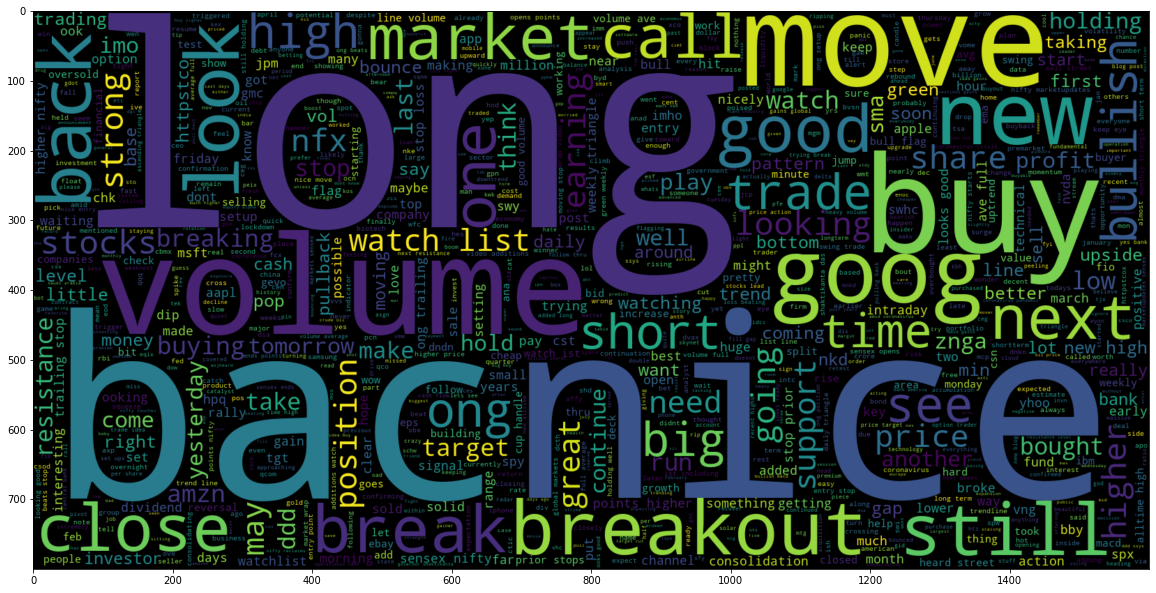

In [ ]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

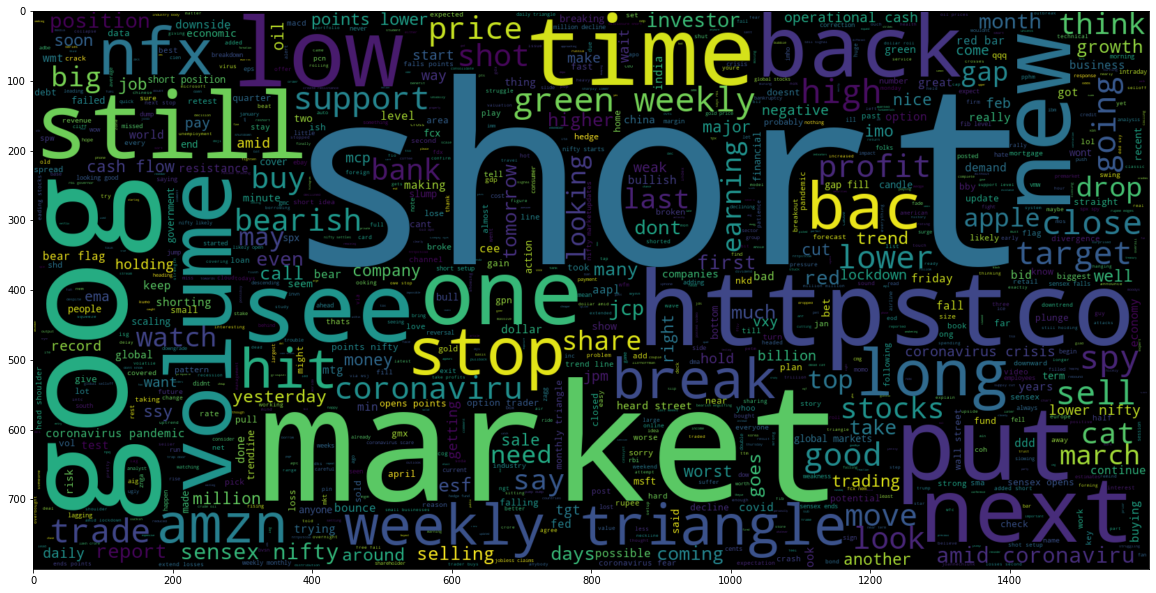

In [ ]:
# plot the word cloud for text that is negative
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

## Visualizing the cleaned data set

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [ ]:
nltk.download('punkt')
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 20


In [ ]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

In [ ]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



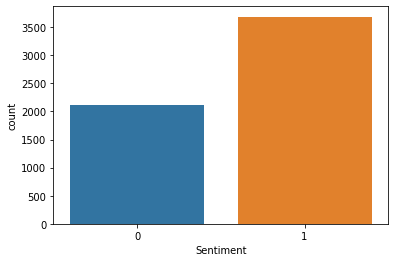

In [ ]:
# plot the word count
sns.countplot(stock_df['Sentiment'])

## Tokenizer

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [ ]:
# obtaining the total number of words present in the dataset
list_of_words=[]
for i in stock_df['Text Without Punc & Stopwords Joined']:
  for j in i:
    list_of_words.append(i)
list_of_words

['kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts',
 'kickers watchl

In [ ]:
## total number of unique words
total_words=len(list(set(list_of_words)))
total_words

5691

In [ ]:
# split the data into test and train 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape

(5211,)

In [ ]:
X_test.shape

(580,)

In [ ]:
X_train

3671    [nice, bmy, lot, volume, though, first, pullba...
3860    [csn, shoing, real, nice, green, vol, bar, tra...
4859                [sgmo, current, target, second, darn]
803             [amzn, still, uptrend, motion, buy, dips]
5523    [gold, imports, slump, march, lowest, years, r...
                              ...                        
5094    [patfitzgerald, xfl, middle, promising, reboot...
3898                      [axti, eleased, news, watching]
4383    [bears, downgrades, samsung, going, long, call...
2066                                  [cee, short, entry]
3647           [job, managed, job, mng, mng, yes, little]
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [ ]:
train_sequences

[[12, 3646, 293, 2, 555, 83, 170, 967],
 [347, 3647, 460, 12, 42, 128, 413, 25, 482, 3648, 304],
 [2481, 461, 43, 305, 2482],
 [47, 8, 326, 1525, 17, 848],
 [283, 2483, 706, 95, 1109, 145, 226, 2484, 3649],
 [707, 246, 348, 58, 18, 196],
 [1110, 462, 120],
 [3650,
  849,
  2485,
  1915,
  2486,
  1280,
  968,
  2487,
  14,
  708,
  1916,
  1281,
  1526,
  483,
  3651],
 [2488, 3652, 521, 190, 73, 146, 17, 13, 1917, 1282, 349, 1283, 179],
 [1527],
 [9, 93, 969, 1918, 414, 642, 145, 27],
 [21, 247, 1528, 44, 99, 2489, 147, 2490, 1919],
 [23, 415, 484, 643, 522, 373, 1529],
 [212, 1530, 43, 60],
 [258, 1284, 2491, 148, 157, 350, 75, 709, 14, 374, 48, 1920],
 [265, 327, 28, 76, 1],
 [850,
  1531,
  46,
  2492,
  1921,
  2493,
  160,
  7,
  1922,
  1923,
  970,
  31,
  306,
  17,
  1921,
  3653],
 [10, 1532, 35, 113],
 [233, 5, 2494, 396, 48, 1111, 233, 94, 124, 851, 555],
 [23, 266, 10, 171],
 [283, 603, 604, 3654, 172, 58, 18, 971],
 [180, 259, 196, 16, 267, 1285, 397, 31, 3655, 3656, 249

In [ ]:
test_sequences

[[272, 1, 1009],
 [5, 2],
 [2824, 254, 950],
 [2261, 76, 793, 830, 49, 37, 11],
 [390, 270, 23, 27, 3443, 2027, 239, 4532, 27, 97],
 [558, 1268, 650, 824, 3577, 4708, 466, 4350, 2143],
 [9, 1501, 427, 526, 404, 78, 100, 28],
 [1340, 595, 96, 221, 75],
 [243, 24],
 [1924, 1077, 435, 574, 162, 56, 392],
 [235, 2, 34, 579, 431, 637, 987, 109, 7, 54, 645],
 [283, 1698, 459, 1097, 745, 1592],
 [1484, 1697, 5, 46, 190],
 [1300, 205, 449, 806, 186, 631, 1181, 486, 49],
 [123, 2480, 1437, 214, 37, 208],
 [2687, 65, 50, 128, 1282, 236, 1253, 33, 15, 103, 84, 1287, 360],
 [474, 31, 237, 262, 51, 243, 63, 65, 2],
 [124, 464, 396, 596],
 [78, 529, 67, 17, 221],
 [1485, 153, 1239, 233, 343, 117, 237],
 [12, 312, 835, 2657],
 [1565, 1566, 11, 400, 533, 27, 5, 1131, 21, 65],
 [83, 448, 7, 2330, 42, 357, 287],
 [371, 2410, 412],
 [1515, 619],
 [7, 156, 207, 109, 2439, 109, 1011, 141, 364],
 [115, 21, 858, 371, 5418, 865, 338, 45],
 [3495, 5089, 3085, 113, 5554, 226],
 [243, 35, 59, 106, 70, 3419, 3166

In [ ]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 3860    [csn, shoing, real, nice, green, vol, bar, tra...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [347, 3647, 460, 12, 42, 128, 413, 25, 482, 3648, 304]


In [ ]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [  12 3646  293    2  555   83  170  967    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [ 347 3647  460   12   42  128  413   25  482 3648  304    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [2481  461   43  305 2482    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [ ]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
y_train_cat.shape

(5211, 2)

In [ ]:
y_test_cat.shape

(580, 2)

In [ ]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## LSTM

In [ ]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         2913792   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 3,734,402
Trainable params: 3,734,402
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 34s 256ms/step - loss: 0.6584 - acc: 0.6408 - val_loss: 0.6682 - val_acc: 0.6203
Epoch 2/2
131/131 [==============================] - 33s 251ms/step - loss: 0.4874 - acc: 0.7793 - val_loss: 0.5341 - val_acc: 0.7498


In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.6844827586206896

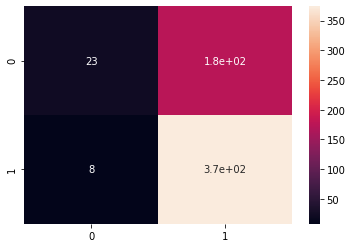

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)